# Introduction to the CIFAR-10 Classification Problem

In this exercise, we will explore a common problem in computer vision: image classification. The goal is to build and train a Convolutional **Neural Network (CNN)** to classify images from the **CIFAR-10 dataset**.

![Alt Text](./images/cf10.png)

## The CIFAR-10 Dataset:

The CIFAR-10 dataset is a collection of 60,000 color images, each measuring 32x32 pixels, divided into 10 distinct classes:
 - Airplane
 - Automobile
 - Bird
 - Cat
 - Deer
 - Dog
 - Frog
 - Horse
 - Ship
 - Truck

The dataset is split into:

 - **50,000 training images** to teach the model.
 - **10,000 test images** to evaluate its performance. 

Each image in the dataset belongs to one of these classes, and the task is to predict the correct class label for each image.

## Problem definition:

Your objective is to:

 1. **Design and train a CNN** that can classify images from the CIFAR-10 dataset into one of the 10 categories.
 2. Understand the **key components of CNNs** such as convolutional layers, pooling layers, and fully connected layers.
 3. Implement methods to **improve performance** using techniques like regularization, normalization, and tuning hyperparameters.
 4. **Evaluate the model's performance** on unseen test data and analyze its accuracy and loss.

## Setting Up the Environment

 - *torch* and *torch.nn*: PyTorch modules for building neural networks.

 - *torchvision*: Provides utilities for loading and preprocessing datasets like CIFAR-10.

 - *matplotlib* and *numpy*: Libraries for visualization and numerical operations.

In [67]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Checking for Device Availability

This block checks for hardware acceleration support. The model will run on GPU (*cuda*) if available, otherwise on CPU. For macOS users, it checks for Apple’s MPS backend.

In [68]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.mps.is_available():
    device = torch.device("mps")
print("Running on device:", device)

Running on device: cpu


## Data Preprocessing and Loading

1. **transform**: Applies sequence of transformations to the images.

    - *ToTensor()*: Converts images to tensors.

    - *Normalize*: Scales pixel values for faster convergence.
2. **train_dataset** and **test_dataset**: Load CIFAR-10 dataset with specified transformations.
3. **train_loader** and **test_loader**: Wraps datasets into iterable objects for batch processing.
    - *batch_size*: Number of samples processed together.
    - *shuffle*: Randomizes the order of data for training.

In [69]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=12,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=12,
                                         shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


This attribute provides a dictionary mapping the class labels (e.g., 'airplane', 'automobile') to numerical indices used by the model.

In [70]:
train_dataset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

## Visualizing Images and Understanding Class Mappings

Here we are:
   - Defining a helper function *imshow* to visualize images, reversing the normalization applied during preprocessing.
   - Visualizing a batch of training images in a grid format to get a clear understanding of what the model will process during training.

In [71]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [72]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

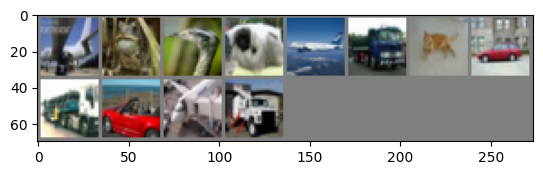

In [73]:
imshow(torchvision.utils.make_grid(images))

## Building the CNN Model

1. **First Convolutional Block**:

    - *Conv2d(3, 32, kernel_size=3, stride=1, padding=1)*: Extracts 32 feature maps using a 3x3 kernel.

    - *ReLU*: Introduces non-linearity.

    - *BatchNorm2d(32)*: Normalizes feature maps for faster and more stable training.

    - *MaxPool2d*: Reduces spatial dimensions by half.

2. **Second Convolutional Block**:

    - Similar to the first block but increases the feature maps to 64.

3. **Third Convolutional Block**:

    - Further increases the feature maps to 128.

4. **Flatten Layer**:

    - Converts the 3D feature maps into a 1D vector for the fully connected layers.

5. **Fully Connected Layers**:

    - *Linear(128 * 4 * 4, 256)*: The input size matches the flattened output of the convolutional layers.

    - *Dropout(0.5)*: Regularization technique to prevent overfitting by randomly dropping neurons.

    - *Linear(256, 128)*: Reduces to 128 neurons with another dropout layer.

    - *Linear(128, 10)*: Outputs class probabilities for 10 classes.

In [79]:
model = nn.Sequential(
    # First Convolutional Block
    nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1), 
        nn.ReLU(),
        nn.BatchNorm2d(32), 
        nn.MaxPool2d(kernel_size=2),  
    ),
    # Second Convolutional Block
    nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size=2),
    ),
    # Third Convolutional Block
    nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.MaxPool2d(kernel_size=2),
    ),
    # Flatten Layer
    nn.Flatten(),
    # Fully Connected Layers
    nn.Sequential(
        nn.Linear(128 * 4 * 4, 256),  
        nn.ReLU(),
        nn.Dropout(0.5),  
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 10)  # CIFAR-10 has 10 classes
    )
).to(device)

Overview of the model:

In [80]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Sequential(
    (0): Linear(in_features=2048, out_features=256, bias=True)
    

## Defining Loss Function and Optimizer

 - *CrossEntropyLoss*: Computes the difference between predicted and actual class probabilities.

 - *Adam*: Optimizer that adapts learning rates for each parameter, often preferred for deep learning tasks.

In [81]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00025)

##  Monitoring Training and Validation Performance

This block performs both training and validation in a single loop across multiple epochs, tracking the model's performance.

1. **Training Phase**:

    - *model.train()*: Puts the model into training mode, enabling features like dropout and batch normalization.
    - For each batch:
         - The model processes the input and predicts class probabilities.
         - Loss Calculation: Measures how far predictions are from the actual labels.
         - Backward Pass: Calculates gradients using backpropagation.
         - Optimizer Step: Updates the model's weights to minimize the loss.
    - Accuracy Calculation: Compares predictions with true labels to calculate accuracy for the training data.
2. **Validation Phase**:

    - *model.eval()*: Switches the model to evaluation mode, disabling certain training-specific features like dropout.
    - For each batch in the validation set:
        - The model predicts class probabilities and computes the validation loss.
        - Accuracy Calculation: Measures how well the model generalizes to unseen data.
    - No gradient updates occur during validation (*torch.no_grad()*).
3. **Storing Metrics**:

    - Average training and validation losses and accuracies for each epoch are stored in separate lists (*train_losses*, *val_losses*, *train_accuracies*, *val_accuracies*).
4. **Output**:

    - Prints the training and validation loss and accuracy for each epoch, helping you monitor performance trends.
5. **Saving models**:    
    - The model is saved after every epoch, allowing us to select the best-performing version before overfitting begins.

In [82]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(10):
    # Training phase
    model.train()
    train_loss_sum = 0
    train_correct = 0
    train_total = 0

    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()  
        outputs = model(X)  
        loss = loss_fn(outputs, y)  
        loss.backward() 
        optimizer.step()  
        
        train_loss_sum += loss.item()

        _, predicted = torch.max(outputs, 1)
        train_total += y.size(0)
        train_correct += (predicted == y).sum().item()

    train_loss_avg = train_loss_sum / len(train_loader)
    train_accuracy = train_correct / train_total
    train_losses.append(train_loss_avg)
    train_accuracies.append(train_accuracy)

    model.eval()
    val_loss_sum = 0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)

            outputs = model(X)  
            loss = loss_fn(outputs, y)  
            val_loss_sum += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_total += y.size(0)
            val_correct += (predicted == y).sum().item()

    val_loss_avg = val_loss_sum / len(test_loader)
    val_accuracy = val_correct / val_total
    val_losses.append(val_loss_avg)
    val_accuracies.append(val_accuracy)
    torch.save(model.state_dict(), 'model_' + str(epoch + 1) + '.pth')

    print(f"Epoch {epoch + 1}:")
    print(f"Training Loss: {train_loss_avg:.4f}, Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss_avg:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1:
Training Loss: 1.3997, Training Accuracy: 0.5006
Validation Loss: 0.9749, Validation Accuracy: 0.6615
Epoch 2:
Training Loss: 1.0028, Training Accuracy: 0.6556
Validation Loss: 0.8190, Validation Accuracy: 0.7186
Epoch 3:
Training Loss: 0.8491, Training Accuracy: 0.7134
Validation Loss: 0.7618, Validation Accuracy: 0.7396
Epoch 4:
Training Loss: 0.7448, Training Accuracy: 0.7499
Validation Loss: 0.7051, Validation Accuracy: 0.7624
Epoch 5:
Training Loss: 0.6584, Training Accuracy: 0.7789
Validation Loss: 0.6903, Validation Accuracy: 0.7683
Epoch 6:
Training Loss: 0.5984, Training Accuracy: 0.7993
Validation Loss: 0.6761, Validation Accuracy: 0.7760
Epoch 7:
Training Loss: 0.5435, Training Accuracy: 0.8184
Validation Loss: 0.6835, Validation Accuracy: 0.7762
Epoch 8:
Training Loss: 0.5028, Training Accuracy: 0.8308
Validation Loss: 0.6962, Validation Accuracy: 0.7862
Epoch 9:
Training Loss: 0.4588, Training Accuracy: 0.8454
Validation Loss: 0.6994, Validation Accuracy: 0.7827
E

## Visualizing Training and Validation Trends

This block visualizes the trends of training and validation losses and accuracies across epochs, helping identify issues like overfitting or underfitting.

1. **Loss Plot**:

    - X-axis: Epochs (1 to 10).
    - Y-axis: Loss (average per epoch).
    - Curves:
        - Training Loss: Tracks the loss during training.
        - Validation Loss: Tracks the loss on unseen validation data.
    - Insight: Divergence between training and validation losses indicates overfitting.
2. **Accuracy Plot**:

    - X-axis: Epochs (1 to 10).
    - Y-axis: Accuracy (percentage of correct predictions).
    - Curves:
        - Training Accuracy: Tracks the model's accuracy on the training dataset.
        - Validation Accuracy: Tracks accuracy on unseen validation data.
    - Insight: Consistently high training accuracy but low validation accuracy indicates overfitting.
3. **Purpose**:

    - Visualizations provide clear insights into the model's performance.
    - Help in diagnosing potential issues like overfitting or underfitting.
    - Guide decisions on hyperparameter tuning, regularization, or early stopping.

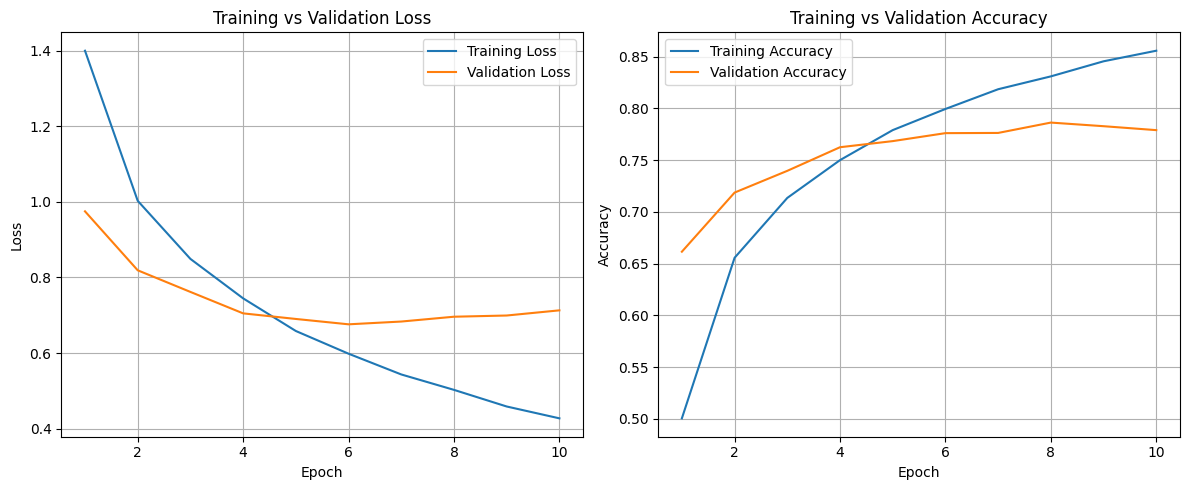

In [83]:
plt.figure(figsize=(12, 5))

# Plot Training vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_losses, label='Training Loss')
plt.plot(range(1, 11), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 11), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion: Using the Model After Epoch 6

After training and analyzing the trends in **validation loss** and **validation accuracy**, we observe that both metrics stagnate starting from **epoch 6**. This indicates that further training may not lead to improved generalization on the validation set and could risk overfitting.

In [87]:
best_model = model.load_state_dict(torch.load('model_6.pth',weights_only=True))

By selecting the **best-performing model** (epoch 6 in this case), we ensure that the model achieves **optimal performance** on the validation set without overfitting.